In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "calabria"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,18,Calabria,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.000
1,2020-02-26T18:00:00,18,Calabria,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.000
2,2020-02-27T18:00:00,18,Calabria,0,0,0,0,0,0,0,...,0.0,11.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.000
3,2020-02-28T18:00:00,18,Calabria,0,0,0,1,1,1,1,...,0.0,7.0,0.0,1.0,0.00,0.00,14.29,0.00,0.00,0.000
4,2020-02-29T17:00:00,18,Calabria,0,0,0,1,1,0,0,...,0.0,6.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,2020-11-12T17:00:00,18,Calabria,298,21,319,6241,6560,423,426,...,1.0,3313.0,3313.0,408.0,6.58,4.86,12.86,12.86,16.67,6.942
262,2020-11-13T17:00:00,18,Calabria,338,27,365,6312,6677,117,297,...,7.0,2957.0,2913.0,71.0,7.40,5.47,10.04,10.20,28.57,4.527
263,2020-11-14T17:00:00,18,Calabria,345,26,371,6615,6986,309,333,...,5.0,3373.0,3358.0,303.0,7.01,5.31,9.87,9.92,-3.70,4.987
264,2020-11-15T17:00:00,18,Calabria,342,41,383,6656,7039,53,344,...,5.0,2559.0,2521.0,41.0,10.70,5.44,13.44,13.65,57.69,4.924


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 16, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 297
Nuovi tamponi: 1729.0
Percentuale nuovi positivi/nuovi tamponi: 17.2 %
Nuovi guariti: 62.0
Nuovi deceduti: 6.0
Variazione positivi ricoverati con sintomi: 16.0
Variazione positivi in terapia intensiva: 4.0
Variazione positivi in isolamento dimiciliare: 209.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 16, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-09-17T17:00:00,18,Calabria,26,4,30,375,405,16,16,...,0.0,1845.0,1845.0,16.0,13.33,7.41,0.87,0.87,100.00,4.113
1,2020-09-18T17:00:00,18,Calabria,24,4,28,393,421,16,28,...,0.0,1777.0,1777.0,18.0,14.29,6.65,1.58,1.58,0.00,6.914
2,2020-09-19T17:00:00,18,Calabria,27,4,31,414,445,24,25,...,0.0,1880.0,1880.0,21.0,12.90,6.97,1.33,1.33,0.00,5.938
3,2020-09-20T17:00:00,18,Calabria,30,4,34,427,461,16,22,...,0.0,1632.0,1632.0,13.0,11.76,7.38,1.35,1.35,0.00,4.944
4,2020-09-21T17:00:00,18,Calabria,30,4,34,434,468,7,12,...,0.0,920.0,920.0,7.0,11.76,7.26,1.30,1.30,0.00,2.603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-11-12T17:00:00,18,Calabria,298,21,319,6241,6560,423,426,...,1.0,3313.0,3313.0,408.0,6.58,4.86,12.86,12.86,16.67,6.942
57,2020-11-13T17:00:00,18,Calabria,338,27,365,6312,6677,117,297,...,7.0,2957.0,2913.0,71.0,7.40,5.47,10.04,10.20,28.57,4.527
58,2020-11-14T17:00:00,18,Calabria,345,26,371,6615,6986,309,333,...,5.0,3373.0,3358.0,303.0,7.01,5.31,9.87,9.92,-3.70,4.987
59,2020-11-15T17:00:00,18,Calabria,342,41,383,6656,7039,53,344,...,5.0,2559.0,2521.0,41.0,10.70,5.44,13.44,13.65,57.69,4.924


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

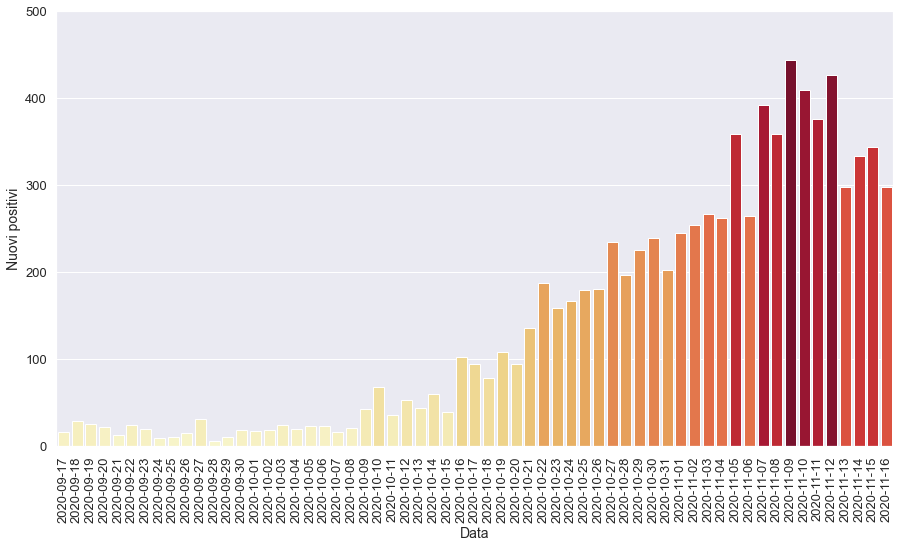

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

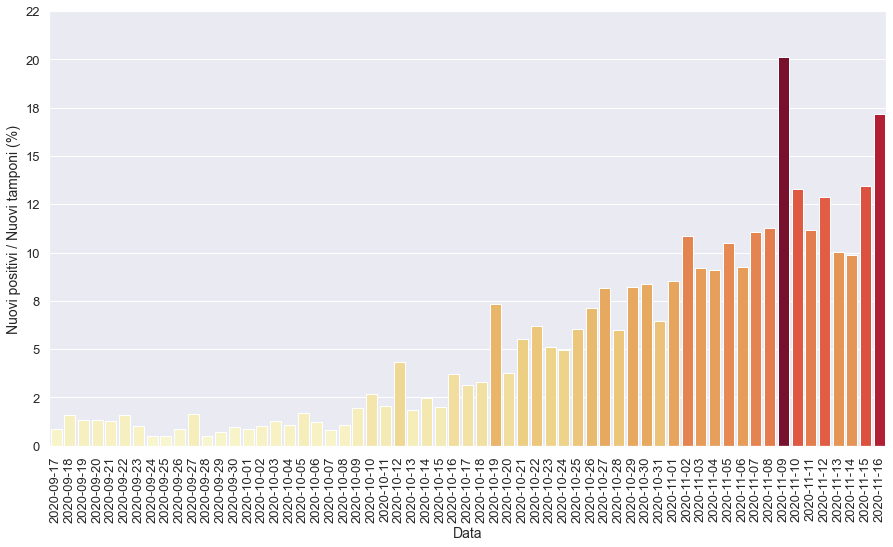

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

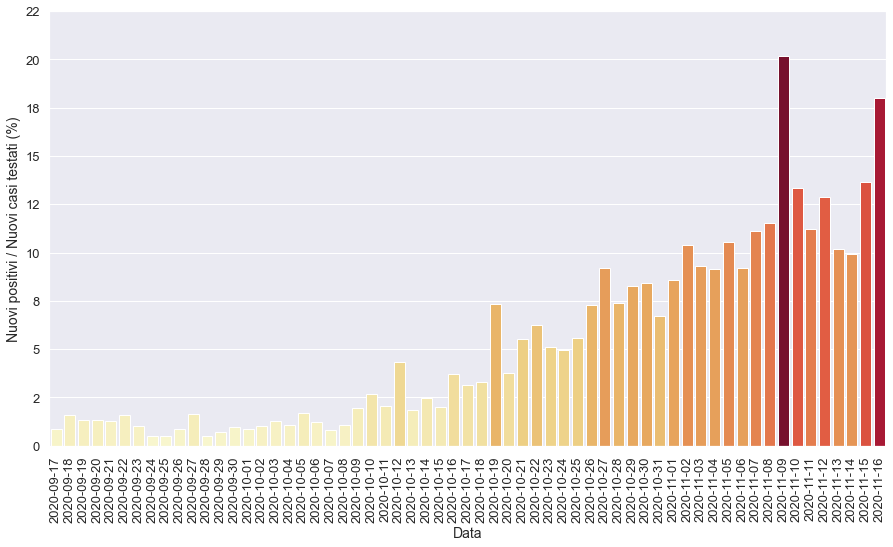

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

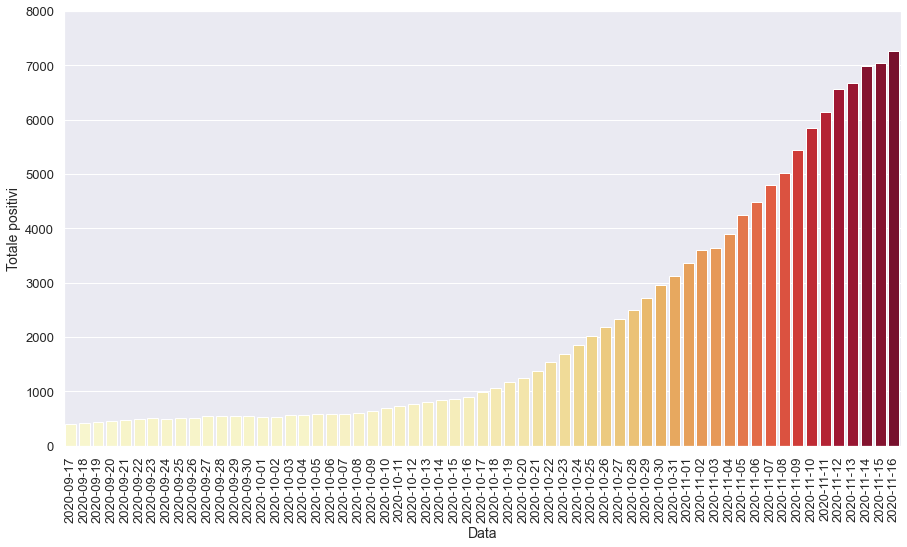

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

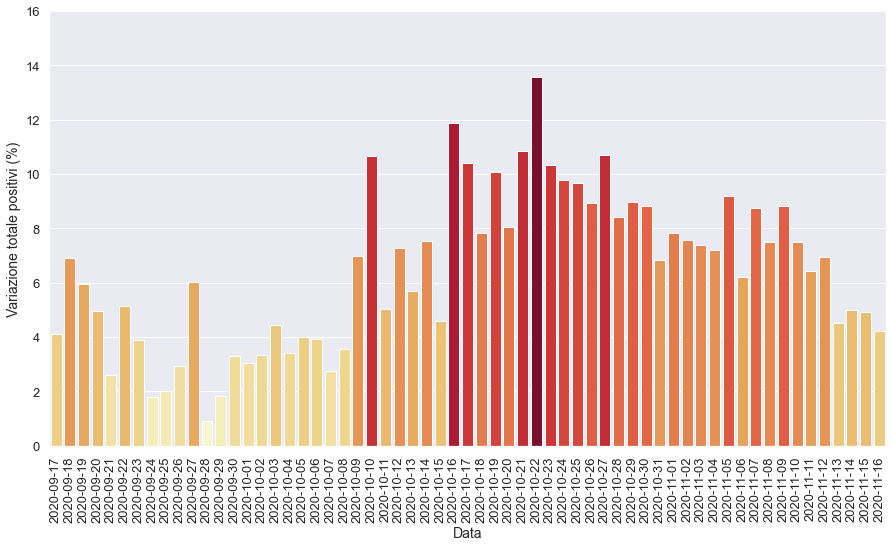

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

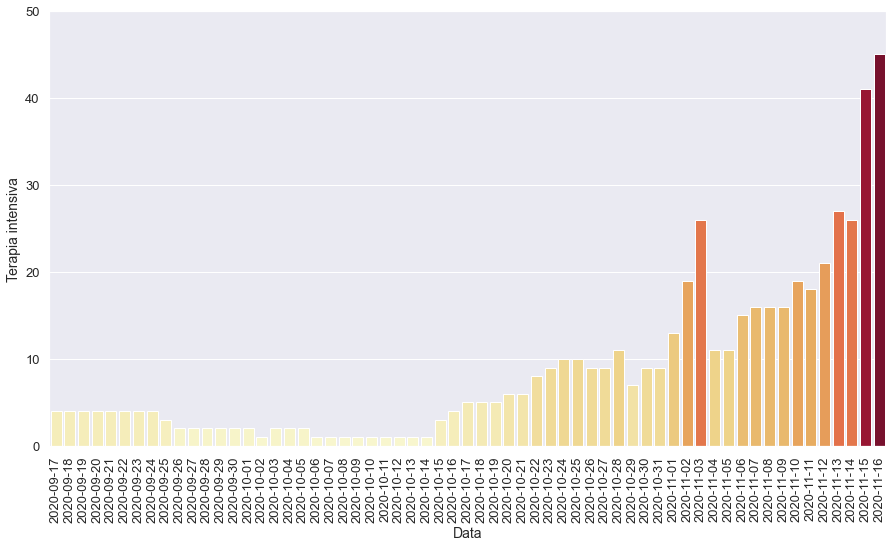

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

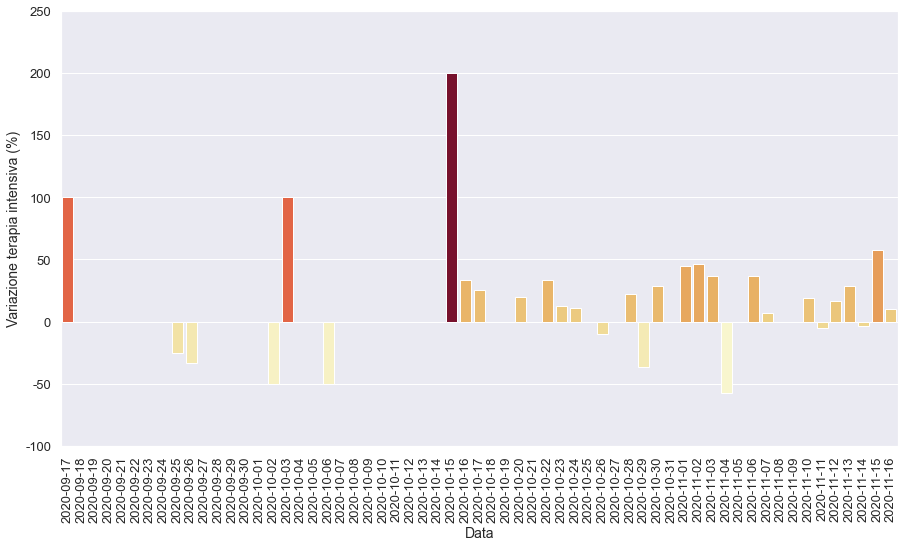

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

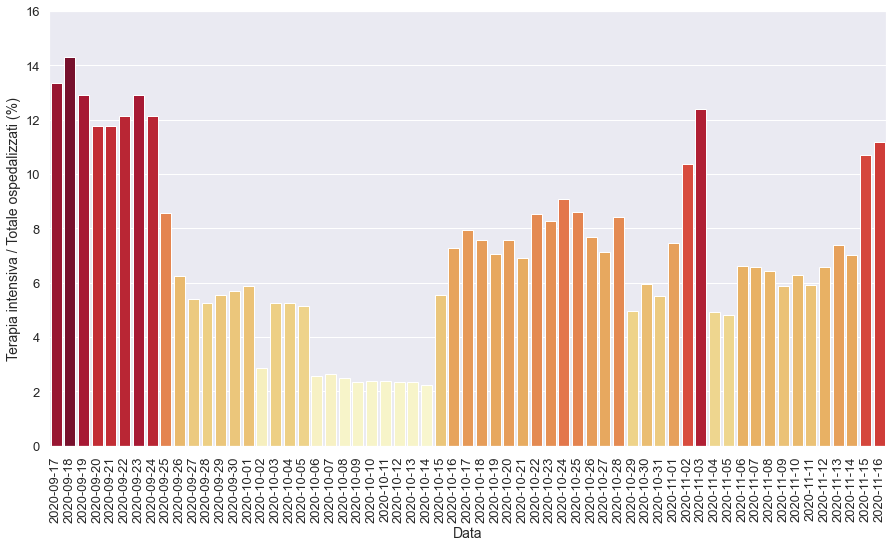

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

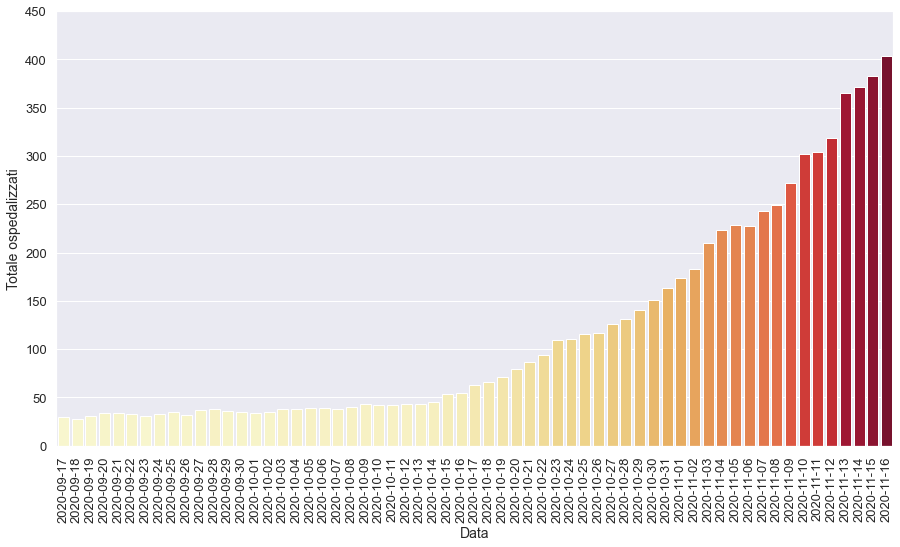

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

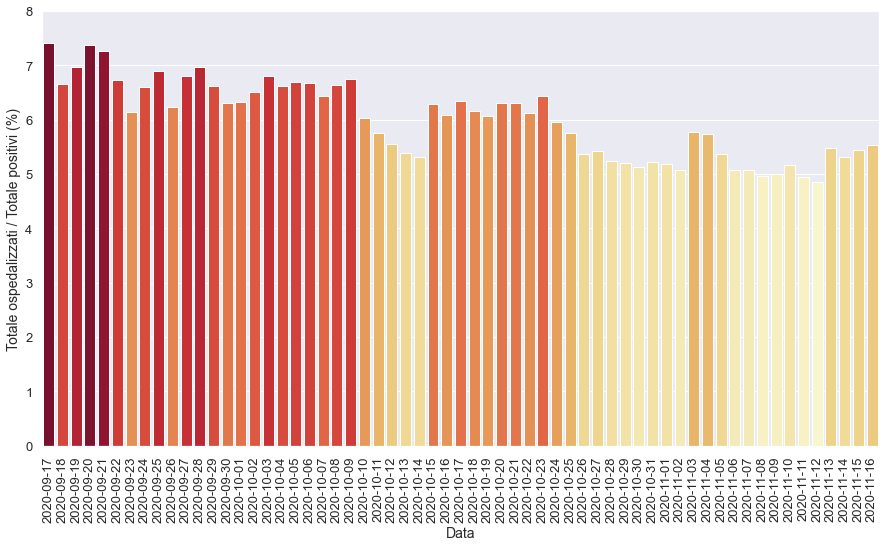

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

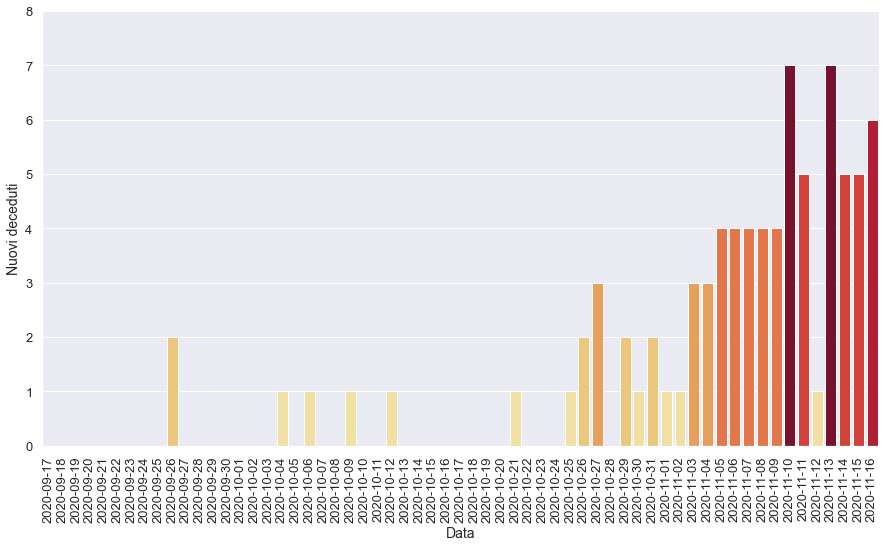

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

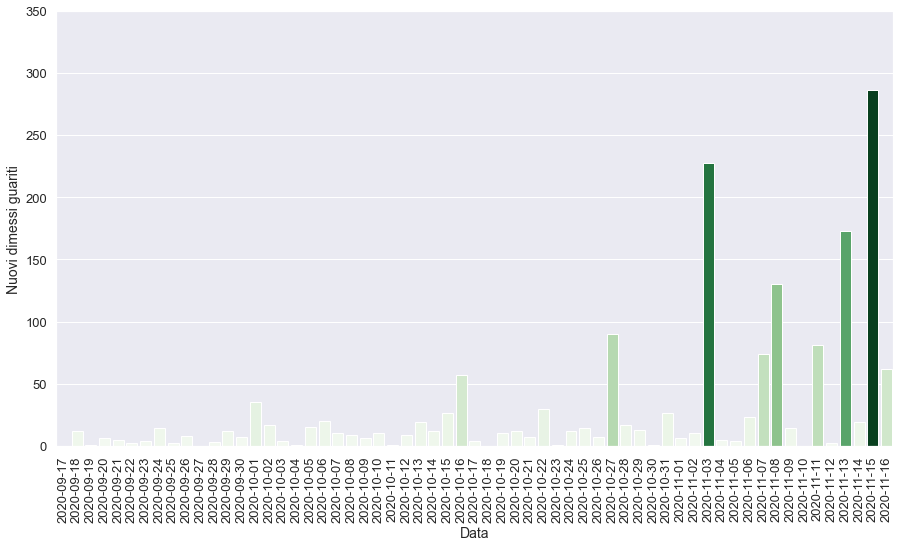

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-17T17:00:00,18,Calabria,58,5,63,931,994,90,94,...,0.0,2995.0,2997.0,82.0,7.94,6.34,3.14,3.14,25.00,10.398
1,2020-10-18T17:00:00,18,Calabria,61,5,66,1006,1072,78,78,...,0.0,2359.0,2357.0,75.0,7.58,6.16,3.31,3.31,0.00,7.847
2,2020-10-19T17:00:00,18,Calabria,66,5,71,1099,1170,98,108,...,0.0,1476.0,1476.0,93.0,7.04,6.07,7.32,7.32,0.00,10.075
3,2020-10-20T17:00:00,18,Calabria,73,6,79,1173,1252,82,94,...,0.0,2477.0,2477.0,74.0,7.59,6.31,3.79,3.79,20.00,8.034
4,2020-10-21T17:00:00,18,Calabria,81,6,87,1293,1380,128,136,...,1.0,2458.0,2449.0,120.0,6.90,6.30,5.53,5.55,0.00,10.863
5,2020-10-22T17:00:00,18,Calabria,86,8,94,1443,1537,157,187,...,0.0,3020.0,2991.0,150.0,8.51,6.12,6.19,6.25,33.33,13.551
6,2020-10-23T17:00:00,18,Calabria,100,9,109,1586,1695,158,159,...,0.0,3110.0,3101.0,143.0,8.26,6.43,5.11,5.13,12.50,10.345
7,2020-10-24T17:00:00,18,Calabria,100,10,110,1739,1849,154,166,...,0.0,3346.0,3334.0,153.0,9.09,5.95,4.96,4.98,11.11,9.794
8,2020-10-25T17:00:00,18,Calabria,106,10,116,1897,2013,164,179,...,1.0,2960.0,3214.0,158.0,8.62,5.76,6.05,5.57,0.00,9.681
9,2020-10-26T17:00:00,18,Calabria,108,9,117,2067,2184,171,180,...,2.0,2527.0,2468.0,170.0,7.69,5.36,7.12,7.29,-10.00,8.942


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

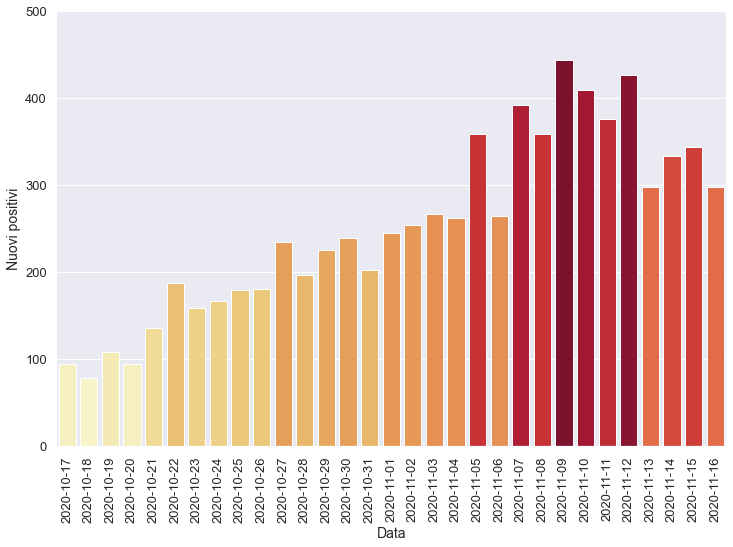

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

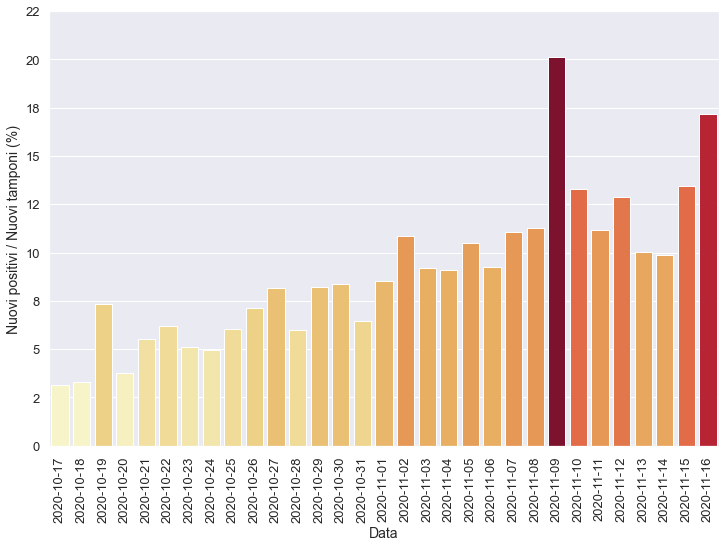

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

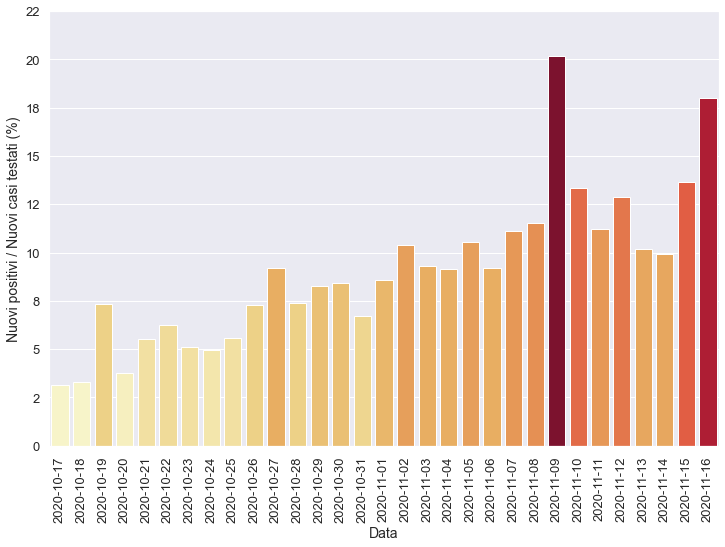

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

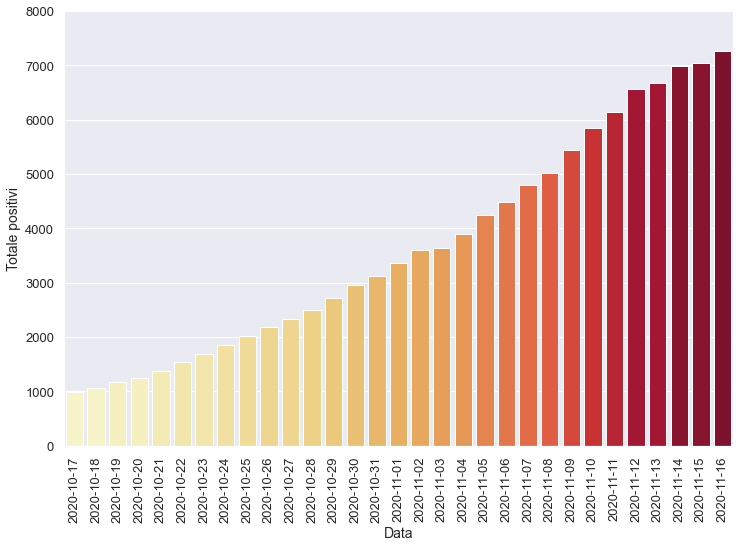

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

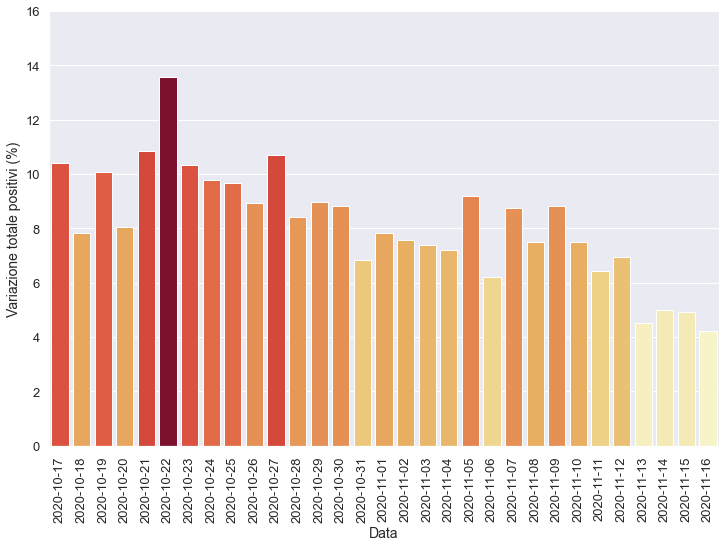

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

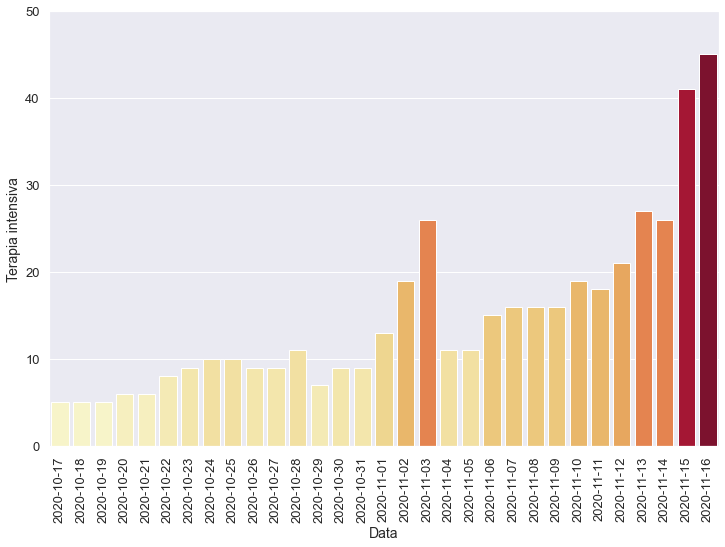

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

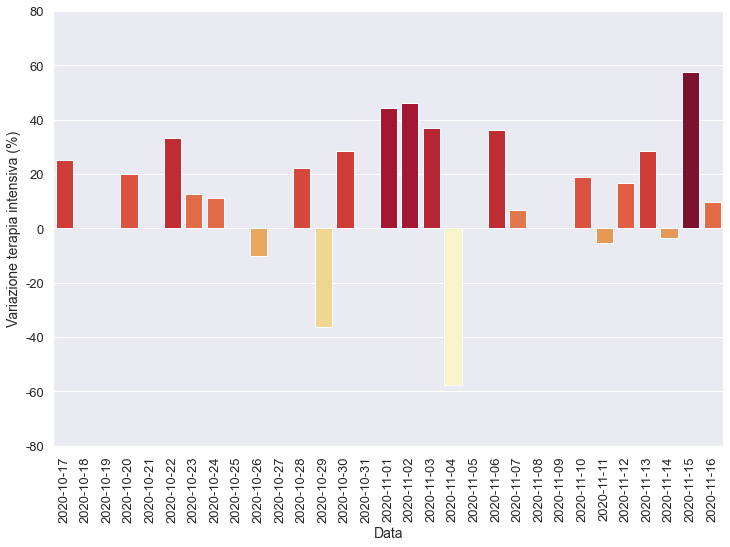

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

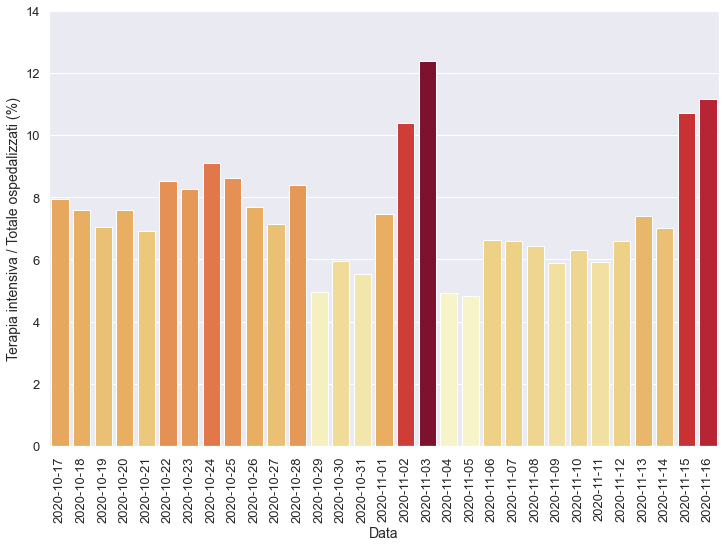

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

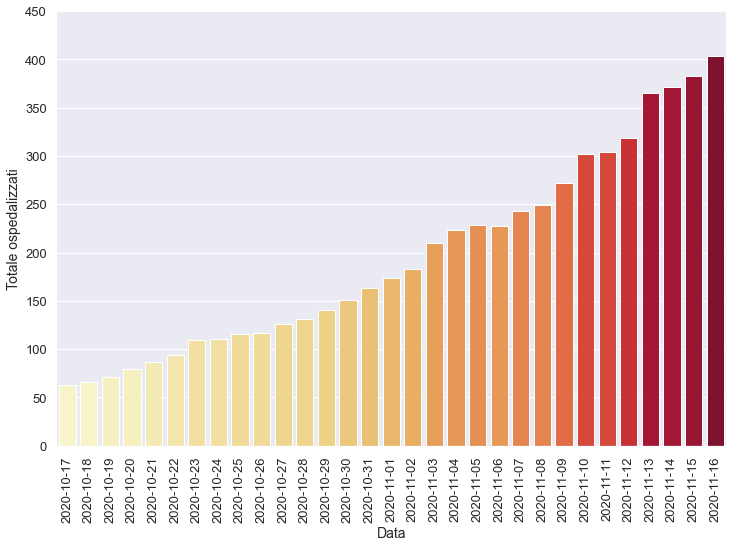

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

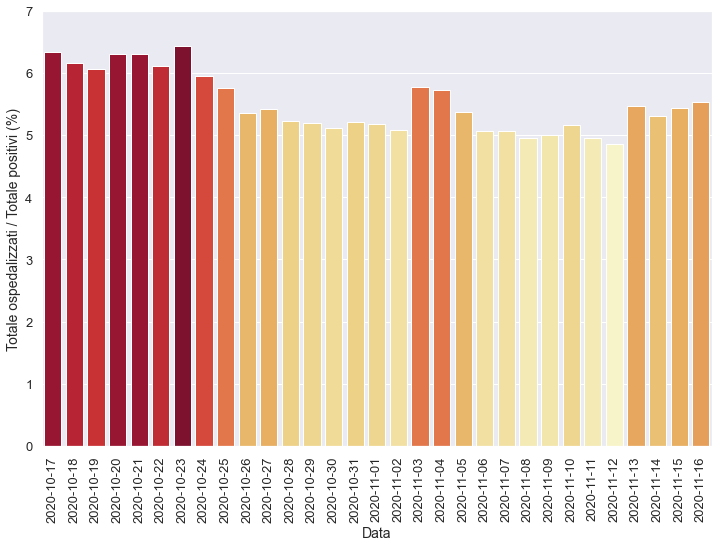

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

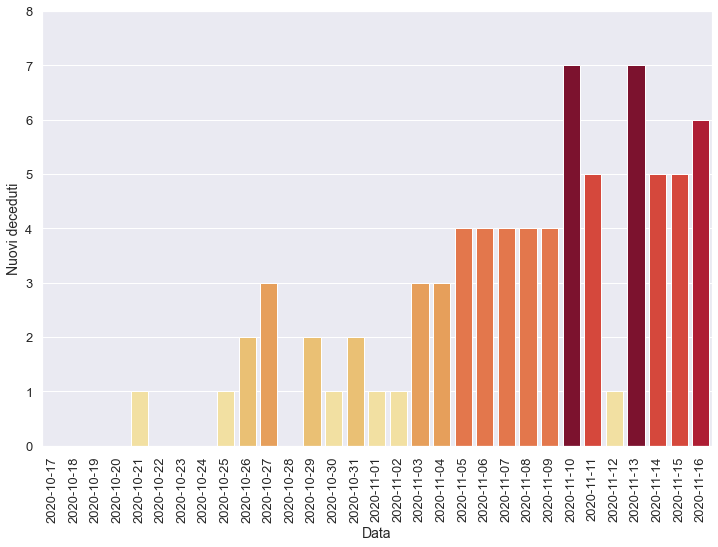

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

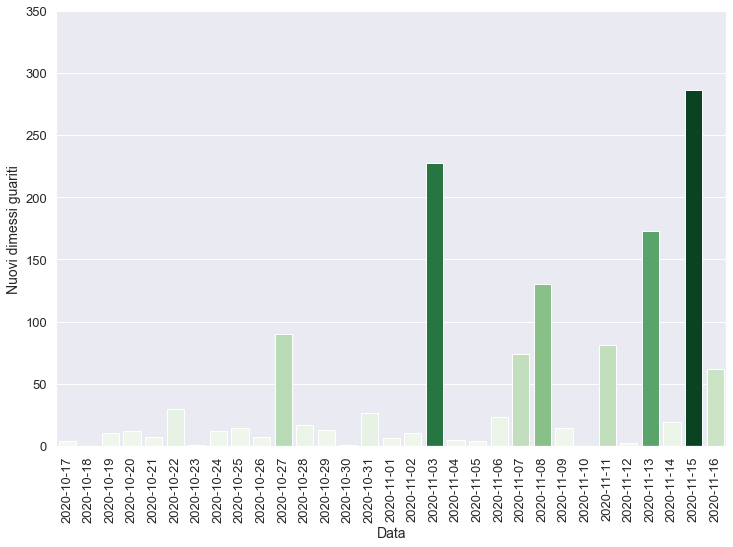

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-09T17:00:00,18,Calabria,256,16,272,5173,5445,425,443,...,4.0,2204.0,2196.0,402.0,5.88,5.00,20.10,20.17,0.00,8.825
1,2020-11-10T17:00:00,18,Calabria,283,19,302,5545,5847,402,409,...,7.0,3082.0,3071.0,372.0,6.29,5.17,13.27,13.32,18.75,7.511
2,2020-11-11T17:00:00,18,Calabria,286,18,304,5833,6137,290,376,...,5.0,3371.0,3351.0,288.0,5.92,4.95,11.15,11.22,-5.26,6.431
3,2020-11-12T17:00:00,18,Calabria,298,21,319,6241,6560,423,426,...,1.0,3313.0,3313.0,408.0,6.58,4.86,12.86,12.86,16.67,6.942
4,2020-11-13T17:00:00,18,Calabria,338,27,365,6312,6677,117,297,...,7.0,2957.0,2913.0,71.0,7.40,5.47,10.04,10.20,28.57,4.527
5,2020-11-14T17:00:00,18,Calabria,345,26,371,6615,6986,309,333,...,5.0,3373.0,3358.0,303.0,7.01,5.31,9.87,9.92,-3.70,4.987
6,2020-11-15T17:00:00,18,Calabria,342,41,383,6656,7039,53,344,...,5.0,2559.0,2521.0,41.0,10.70,5.44,13.44,13.65,57.69,4.924
7,2020-11-16T17:00:00,18,Calabria,358,45,403,6865,7268,229,297,...,6.0,1729.0,1648.0,209.0,11.17,5.54,17.18,18.02,9.76,4.219


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

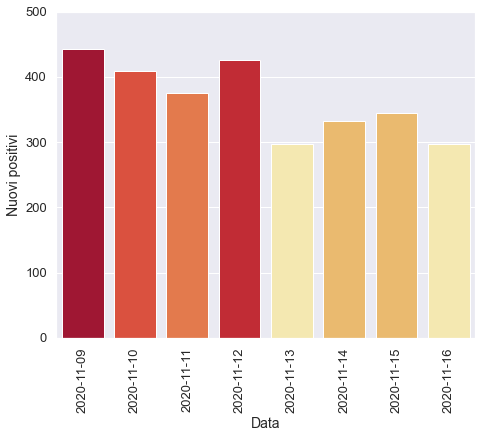

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

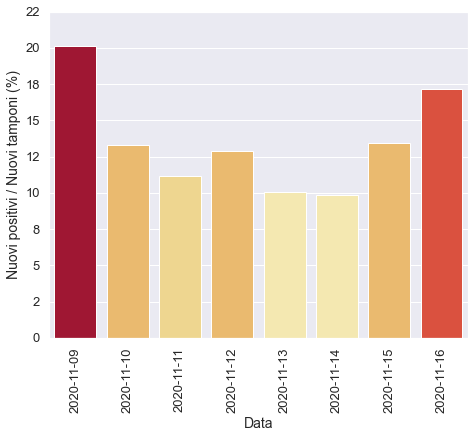

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

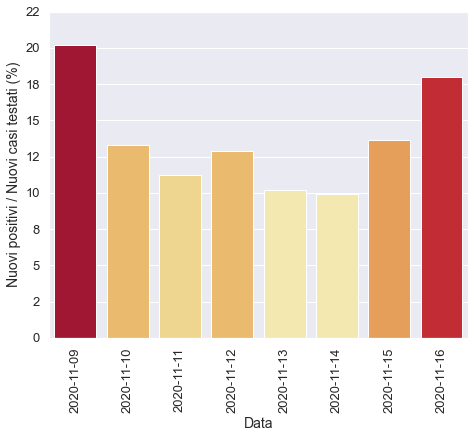

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

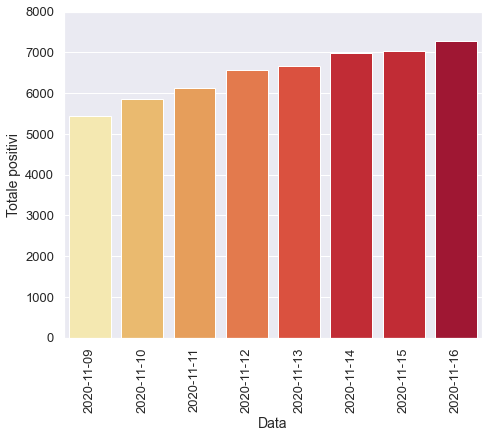

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

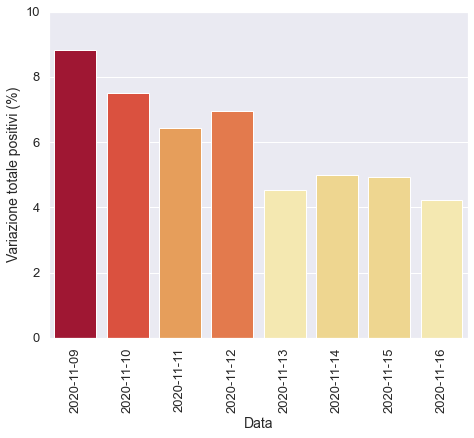

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

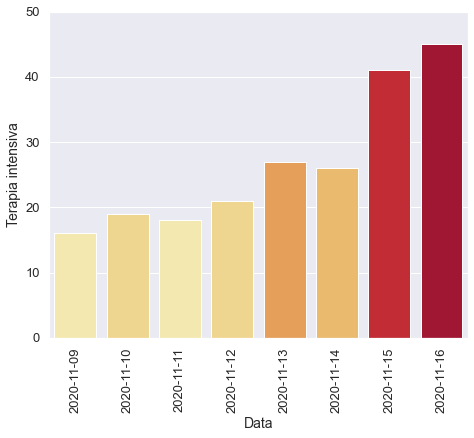

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

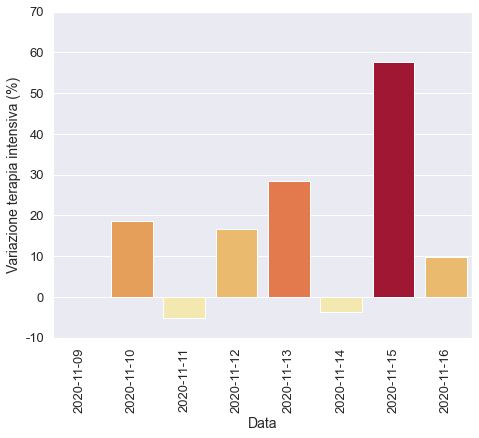

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

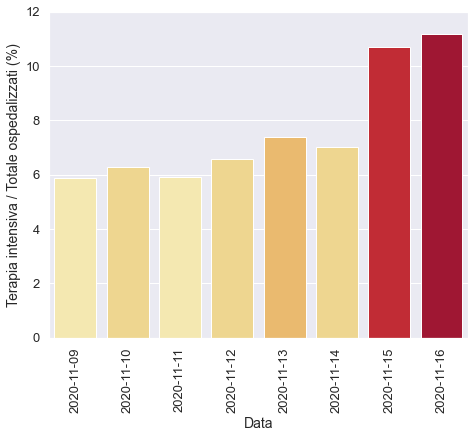

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

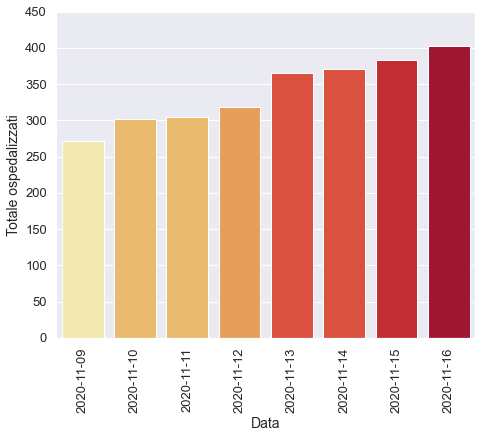

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

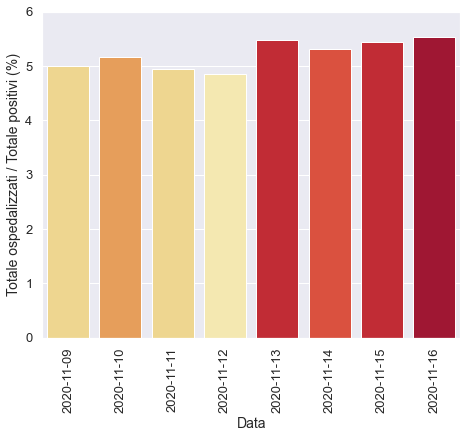

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

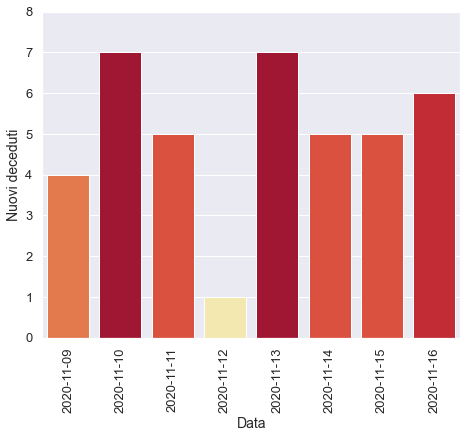

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

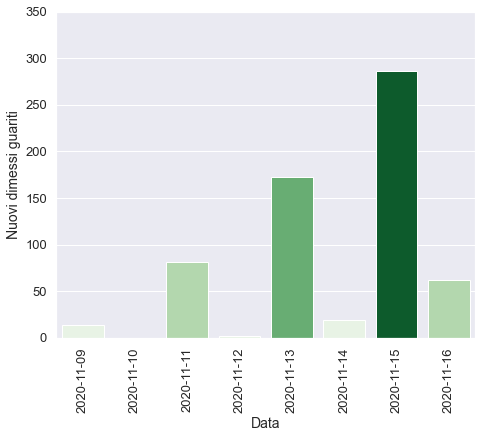

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)